<a href="https://colab.research.google.com/github/bmnds/uea-data-science-02-python-programming/blob/master/trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Final da Disciplina de Programação para Ciência de Dados do Curso de Pós-Graduação em Ciência de Dados da UEA-AM
Dupla: Alberto e Bruno

## Objetivo
Analisar o _dataset_ de _tweets_ fornecido, referente ao período da pandemia, para extrair _insights_ gerais e também a respeito dos temas discutidos, da temporalidade e da localização geográfica.

## Estrutura do Trabalho
O trabalho foi organizado seguindo a ordem de especificação do trabalho fornecida pelo professor.

### 1. Visão Geral
* [ ] Importar todos os **tweets** e descrevê-los
* [ ] Extrair somente as **perguntas** e descrevê-las

### 2. Temas Discutidos
Analisar perguntas, sobre:
* [ ] **Doença**
* [ ] **Medicamentos**
* [ ] **Organizações**
* [ ] **Pessoas**

### 3. Visão Temporal
* [ ] Definir o intervalo de tempo em dias, semanas ou meses
* [ ] Apresentar pelo menos duas análises temporais

### 4. Visão Geográfica
* [ ] Definir como classificar geograficamente os dados fornecidos
* [ ] Apresentar pelo menos duas análises geográficas

## Checklist de Tecnologias
* [x] Google Colaboratory
* [x] GitHub
* [x] Jupyter Notebook
* [ ] NumPy
* [ ] MatPlotLib
* [ ] Seaborn
* [ ] Plotly


## Estrutura do trabalho
* [ ] Importação dos

Importação do pandas

In [13]:
import pandas as pd
import matplotlib
!pip install geopandas
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

Importação do banco de dados

In [2]:
!wget http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz

--2020-10-23 00:38:19--  http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz
Resolving tiagodemelo.info (tiagodemelo.info)... 108.167.188.189
Connecting to tiagodemelo.info (tiagodemelo.info)|108.167.188.189|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143340808 (137M) [application/x-gzip]
Saving to: ‘dados-curso-completo.csv.tar.gz’

dados-curso-complet 100%[===================>] 136.70M  60.8MB/s    in 2.2s    

2020-10-23 00:38:22 (60.8 MB/s) - ‘dados-curso-completo.csv.tar.gz’ saved [143340808/143340808]



In [8]:
!tar -xvf dados-curso-completo.csv.tar.gz

dados-curso-completo.csv


In [14]:
tw=pd.read_csv("dados-curso-completo.csv")

In [15]:
tw.describe()

,retweet,seguidores,latitude,longitude
count,1.658825e+06,1.658825e+06,8720.000000,8720.000000
mean,1.978533e+02,3.257206e+04,-40.237583,-11.117100
std,6.337641e+03,3.680300e+05,20.808494,19.169105
min,0.000000e+00,0.000000e+00,-123.120400,-37.818769
25%,0.000000e+00,1.010000e+02,-47.864334,-23.305300
50%,0.000000e+00,3.800000e+02,-43.955615,-19.624400
75%,0.000000e+00,1.470000e+03,-38.453198,-7.120700
max,1.139763e+06,8.424125e+07,174.789310,58.257776


#1. Visão Geral
Descrição dos twitters com um periodo de janeiro à Julho de 2020

In [16]:
tw.head()

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0,56,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0,5,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0,124,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]


In [17]:
tw.tail()

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
1658820,2020-03-13 17:26:18,broca,whoisdrill,oms: tamo tendo pandemia evitar\n conglomerado...,0,361,pt,NaN,NaN,NaN,NaN,NaN,[]
1658821,2020-05-12 13:02:34,Renato 🇧🇷,VerdadeExpress,"@OsmarTerra Sr. Osmar Terra, gostaria de ouvir...",0,4066,pt,NaN,NaN,NaN,NaN,NaN,[]
1658822,2020-03-19 18:16:30,eugeniocosta8,EugenioCosta8,CIENTISTA DE HARVARD PREVÊ QUE ATÉ 70% DO MUND...,3,5307,pt,NaN,NaN,NaN,NaN,NaN,['CORONAVIRUS']
1658823,2020-04-07 18:14:45,Wagner Mota - Seriedade + Geek,wagnermota75,"#BolsonaroTemRazaoSim porque, quando a prefeit...",0,1000,pt,NaN,NaN,NaN,NaN,NaN,['BolsonaroTemRazaoSim']
1658824,2020-06-02 16:04:51,Fotógrafo,omarcelogoulart,"Em meio a uma pandemia, estamos na luta também...",0,726,pt,São Félix do Araguaia,Brazil,BR,-53.0,-11.0,[]


In [48]:
twselectdata = tw.filter(items=['data'])
twselectdata.min()

data    2020-01-01 00:42:12
dtype: object

In [49]:
twselectdata = tw.filter(items=['data'])
twselectdata.max()

data    2020-07-28 17:19:44
dtype: object

In [43]:
tw.iloc[2:5]

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0,5,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0,124,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]


In [19]:
tw.sigla.unique()

array([nan, 'BR', 'IE', 'PT', 'ES', 'DE', 'CA', 'US', 'AO', 'UG', 'NL',
       'JP', 'GB', 'MZ', 'BE', 'SA', 'VE', 'PK', 'ID', 'CL', 'SN', 'AR',
       'CO', 'FR', 'TR', 'AT', 'PY', 'IT', 'NZ', 'KE', 'CN', 'PA', 'GH',
       'EC', 'HT', 'AU', 'MX', 'PH', 'HR', 'ZA', 'DK', 'IN', 'CR', 'NG',
       'MY', 'KP', 'UY', 'CY', 'EG', 'DO', 'VN', 'BH', 'SV', 'CH', 'AE',
       'LK', 'CV', 'SK', 'SE', 'IL', 'HN', 'ME', 'TH', 'PE', 'CZ', 'LU',
       'OM', 'TW', 'GE', 'IR', 'CI', 'BW', 'UA', 'LB', 'RO', 'KZ', 'TL',
       'BO', 'MO', 'NO', 'CM', 'SG', 'IQ', 'QA', 'JM', 'CD', 'GT', 'EE',
       'CW', 'RU', 'BS', 'KR', 'XK', 'KW', 'GW', 'CU', 'CF', 'TZ', 'PL',
       'VA', 'TT', 'GR', 'GN', 'NI', 'SR', 'JO', 'MA', 'ZW', 'FI', 'GF',
       'AM', 'SI', 'HU', 'GP', 'LA', 'MG', 'AD', 'MC', 'MT', 'TD', 'LT'],
      dtype=object)

In [20]:
tw

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0,56,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0,5,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0,124,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658820,2020-03-13 17:26:18,broca,whoisdrill,oms: tamo tendo pandemia evitar\n conglomerado...,0,361,pt,NaN,NaN,NaN,NaN,NaN,[]
1658821,2020-05-12 13:02:34,Renato 🇧🇷,VerdadeExpress,"@OsmarTerra Sr. Osmar Terra, gostaria de ouvir...",0,4066,pt,NaN,NaN,NaN,NaN,NaN,[]
1658822,2020-03-19 18:16:30,eugeniocosta8,EugenioCosta8,CIENTISTA DE HARVARD PREVÊ QUE ATÉ 70% DO MUND...,3,5307,pt,NaN,NaN,NaN,NaN,NaN,['CORONAVIRUS']
1658823,2020-04-07 18:14:45,Wagner Mota - Seriedade + Geek,wagnermota75,"#BolsonaroTemRazaoSim porque, quando a prefeit...",0,1000,pt,NaN,NaN,NaN,NaN,NaN,['BolsonaroTemRazaoSim']


In [50]:
tw.columns.values

array(['data', 'usuario', 'apelido', 'texto', 'retweet', 'seguidores',
       'idioma', 'lugar', 'pais', 'sigla', 'latitude', 'longitude',
       'hashtags'], dtype=object)

Quantidade de casos por País

In [86]:
twSelectPais = tw.filter(items=['pais'])
contador = twSelectPais.value_counts()
contador.head()

pais         
Brazil           67247
Portugal          2675
United States     1068
Italy              484
Spain              379
dtype: int64

Grafico de barras não fica legal pela quantidade de atributos

AttributeError: ignored

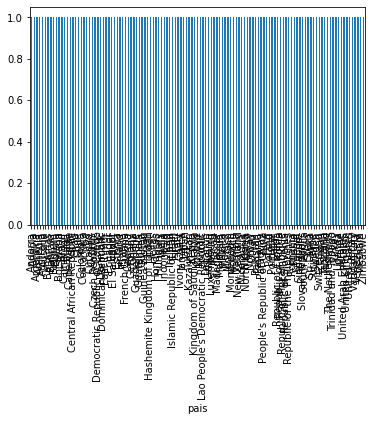

In [82]:
twselectpais.groupby('pais')['pais'].nunique().plot(kind='bar')
twselectpais.show()

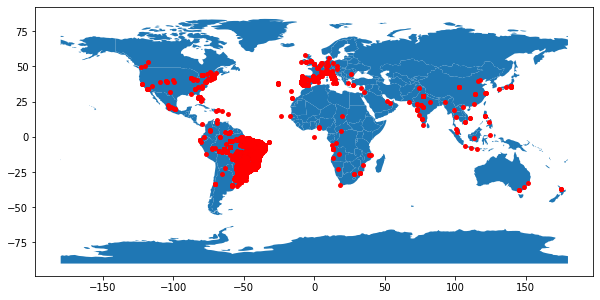

In [94]:
geometry = [Point(xy) for xy in zip(tw['latitude'], tw['longitude'])]
gdf = GeoDataFrame(tw, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

Mostrar o volume de perguntas por período !

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:


The strpdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.



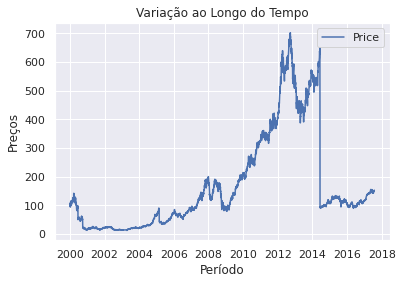

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import matplotlib.dates as mdates

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    stock_price_url = 'https://tiagodemelo.info/datasets/entrada.txt'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()

    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    plt.plot_date(date, closep,'-', label='Price')
 
    plt.xlabel('Período')
    plt.ylabel('Preços')
    plt.title('Variação ao Longo do Tempo')
    plt.legend()
    plt.show()


graph_data('TSLA')

In [51]:
twselectpais.iloc[1:10]

,pais
1,NaN
2,NaN
3,NaN
4,Brazil
5,Brazil
6,NaN
7,NaN
8,NaN
9,NaN


COlocar uma grafico aqui para mostrar quantidade de casos por paises

select de lugares

In [23]:
twselectlugar = tw.filter(items=['lugar'])
twselectlugar.value_counts().sort_index()

lugar                                         
's-Hertogenbosch                                   3
12° Batalhão de Infantaria do Exército (12 BI)     1
3ª Delegacia de Polícia (DP)                       1
89 A Rádio Rock                                    1
@oBarreiro - Capital Do MUNDO                     13
                                                  ..
Смотровая площадка ЦДМ                             1
صُحار                                              1
屏東市                                                1
東京国立博物館 (Tokyo National Museum)                    1
牛嶋神社                                               1
Length: 4500, dtype: int64

todos os textos 


In [29]:
twselect = tw.filter(items=['texto'])
twselect = twselect.dropna()
twselect

,texto
0,@BolsonaroSP Cade o fundão deputado??? Congres...
1,"Em ação preventiva, o Governo do Estado suspen..."
2,Incrível como os defensores do fim do distanci...
3,Fumaça de cigarro pode propagar coronavírus? h...
4,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...
...,...
1658820,oms: tamo tendo pandemia evitar\n conglomerado...
1658821,"@OsmarTerra Sr. Osmar Terra, gostaria de ouvir..."
1658822,CIENTISTA DE HARVARD PREVÊ QUE ATÉ 70% DO MUND...
1658823,"#BolsonaroTemRazaoSim porque, quando a prefeit..."


In [31]:
twselect.groupby('texto').count()

""
texto
!\nclaro que o coronavírus é importante mas aqui a gente já tem as nossas doenças tropicais que têm uma taxa de mort… https://t.co/xqKiTFhJ9K
"! 'Tigre de 4anos de idade do Zoológico do Bronx, nos EUA, testou POSITIVO p/o Coronavírus, c/ outros tigres e leõe… https://t.co/2xQR9zTxiB"
"! ALO ! Durante a quarentena, vamo se juntar no discord pra jogar joguinhos? https://t.co/VjyMlYacN8 Vou estar abri… https://t.co/7SpBN0rifr"
"! Cloroquina - Sem patente\nRemdesivir - Patenteado pela Gilead, empresa da qual o Fauci é acionista. A Gilead tem a… https://t.co/CvnkcTYytB"
"! LYNN E O GATO CARTEIRO 1 DE GRAÇA NO TAPAS !\n\npor causa da COVID, resolvi compartilhar a primeira história de Lyn… https://t.co/QLpNlpavKU"
...
🩺 @minsaude inaugura ala indígena em hospital de #Manaus. Esta é primeira ala voltada para o atendimento de pacient… https://t.co/tqxqyG3Cex
🩺 Cerca de 400 médicos já foram contratados para atuar no combate à Covid-19 na Bahia; inscrições abertas. Saiba ma… https://t.co/jyyBPlKxtU
"🩺 possibilidade de antecipação de colação de grau para profissionais da saúde 🩺\n.\n.\nEm razão da #pandemia, no dia 0… https://t.co/Kd86NcP4iY"


In [104]:
tw.head()

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags,geometry
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[],POINT (nan nan)
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0,56,pt,NaN,NaN,NaN,NaN,NaN,[],POINT (nan nan)
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0,5,pt,NaN,NaN,NaN,NaN,NaN,[],POINT (nan nan)
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[],POINT (nan nan)
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0,124,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[],POINT (-47.87780 -15.77691)


### Extração das Perguntas

In [105]:
import re # lib para trabalhar com expressões regulares
data = []
for tweet in tw.itertuples(index=False):
    sentences = re.findall('[^[?|!|.|;]+]*[?|!|.|;]', tweet.texto)
    questions = list(filter(lambda x: x.endswith('?'), sentences))
    for question in questions:
      new_tweet = (tweet[0:3] + (question,) + tweet[4:14])
      data.append(new_tweet) 
PerguntasDB = pd.DataFrame(data, columns = tw.columns)
PerguntasDB.head()

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags,geometry
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado?,0,138,pt,NaN,NaN,NaN,NaN,NaN,[],POINT (nan nan)
1,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus?,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[],POINT (nan nan)
2,2020-06-25 11:09:19,Andreia Peraro,AndreiaPeraro,@ipratesMD @dr_pampers Será que corremos o ris...,0,86,pt,NaN,NaN,NaN,NaN,NaN,[],POINT (nan nan)
3,2020-04-06 15:44:36,Diorgenes Pandini,diorpandini,Prioridade ?,0,219,pt,NaN,NaN,NaN,NaN,NaN,"['COVID19', 'floripa', 'isolamento']",POINT (nan nan)
4,2020-03-30 00:43:36,Valnei do Val,vdoval,"Que tal uma notícia boa, indo na contramão do ...",0,201,pt,NaN,NaN,NaN,NaN,NaN,[],POINT (nan nan)
